# Linear Regression

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Create random dataset

In [4]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1) 

Text(0.5, 1.0, 'Random data')

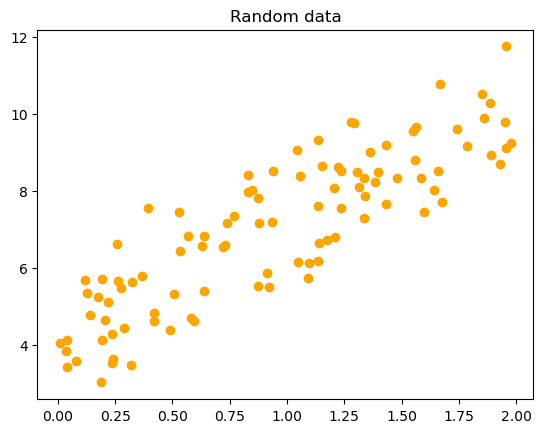

In [18]:
plt.scatter(X, y, c='orange')
plt.title('Random data')

In [167]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), kernel_initializer='normal'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, verbose=1)
y_pred = model.predict(X)

Epoch 1/100


D:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.4344  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 52.8212
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.5977 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 51.6240
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.4660 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 53.1172
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.8815 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 53.2273
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 51.0103
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 53.3731
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51.9758 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.9560 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.1328 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 49.7533
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 51.4327
Epoch 1

In [133]:
loss = model.evaluate(X, y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 45.8446


In [157]:
layer = model.layers[-1]
weights, biases = layer.get_weights()

In [159]:
weights, biases

(array([[0.48134112, 0.30907604, 0.4609699 , 0.3712479 , 0.4367163 ,
         0.40059197, 0.32961416, 0.36910596, 0.3923763 , 0.33585376]],
       dtype=float32),
 array([0.38841397, 0.3886004 , 0.3884368 , 0.3885346 , 0.38846368,
        0.38850296, 0.38857934, 0.38853696, 0.3885119 , 0.38857242],
       dtype=float32))

## Plot predicted data

Text(0.5, 1.0, 'Random data')

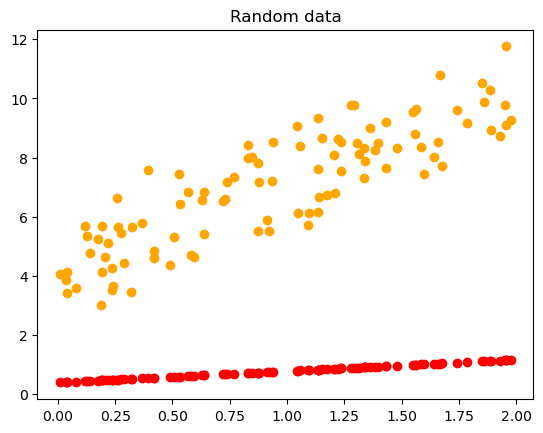

In [169]:
plt.scatter(X, y, c='orange')
plt.scatter(X, y_pred, c='red')
plt.title('Random data')

## MNIST

In [184]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [230]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, y_train = X_train[:5000], y_train[:5000]
X_test, y_test = X_test[:1000], y_test[:1000]

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [200]:
inputs = Input(shape=(28, 28)) 

x = Flatten()(inputs)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [204]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [208]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0162 - val_accuracy: 0.9320 - val_loss: 0.2779
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0133 - val_accuracy: 0.9410 - val_loss: 0.2758
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.9350 - val_loss: 0.2818
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9420 - val_loss: 0.2793
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9400 - val_loss: 0.2900
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9380 - val_loss: 0.2935
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9360 - val_loss: 0.2973
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.

In [210]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9456 - loss: 0.2154
Test loss: 0.26956063508987427
Test accuracy: 0.9319999814033508


In [214]:
predictions = model.predict(X_test)
print(f"Prediction for 1st observation: {predictions[0]}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
Prediction for 1st observation: [7.4057974e-13 8.7171164e-12 5.9739711e-09 4.5235522e-09 3.3518193e-15
 1.3460904e-09 1.0307796e-15 1.0000000e+00 1.1494947e-11 7.8706264e-10]


In [217]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [232]:
images = X_test[:10]
y_true = y_test[:10]

y_pred = model.predict(images)
predicted_labels = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


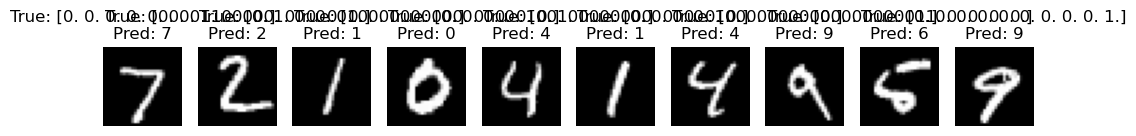

In [237]:
def show(images, true_labels, predicted_labels):
    plt.figure(figsize=(12, 4))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

show(images, y_true, predicted_labels)